# Bill Kiki 00000043854

### Deskripsi Singkat

usia: usia pasien

anemia: penurunan kadar hemoglobin pasien; jika ada anemia: 1 (boolean)

creatinine_phosphokinase: tingkat enzim CPK dalam darah (mcg/L)

diabetes: jika pasien memiliki diabetes: 1 (boolean)

ejection_fraction: persentase (persen) darah yang meninggalkan jantung selama setiap kontraksi

high_blood_pressure: jika pasien memiliki tekanan darah tinggi: 1 (boolean)

trombosit: trombosit dalam darah (kiloplatelet/mL)

serum_kreatinin: kadar kreatinin serum dalam darah (mg/dL)

serum_natrium: konsentrasi natrium darah (mEq/L)

jenis kelamin: Jenis kelamin pasien, Pria:1 Wanita:0

merokok: jika merokok: 1 (boolean)

waktu: periode tindak lanjut (hari)

DEATH_EVENT: Kematian: 1 (Boolean) [Atribut yang memiliki nilai Boolean: 0 = Negatif (Tidak); 1 = Positif (Ya)]

Tujuan dari proyek ini adalah untuk membangun model prediksi terhadap dataset gagal jantung dengan menggunakan 3 algoritma, yaitu: : Random Forest, Support Vector Machines, dan K-Nearest Neighbors.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
import warnings
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from scipy.stats import norm, skew, boxcox
import statsmodels.formula.api as sm

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv', delimiter = ',')
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [3]:
for col in dataset.columns:
    print("Values of '{}':\n".format(col),dataset[col].unique())

Values of 'age':
 [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
Values of 'anaemia':
 [0 1]
Values of 'creatinine_phosphokinase':
 [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   3

In [4]:
dataset.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

<AxesSubplot:>

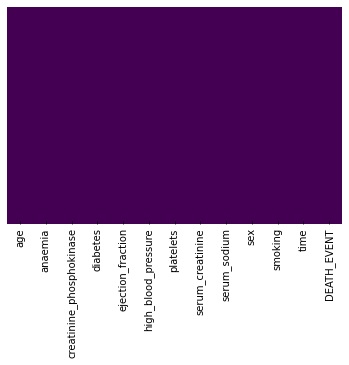

In [5]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
dataset.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
categoricals=['anaemia','diabetes','high_blood_pressure','sex','smoking']
numericals=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
target=["DEATH_EVENT"]

In [8]:
dataset['anaemia'] = dataset['anaemia'].astype('category')
dataset['diabetes'] = dataset['diabetes'].astype('category')
dataset['high_blood_pressure'] = dataset['high_blood_pressure'].astype('category')
dataset['sex'] = dataset['sex'].astype('category')
dataset['smoking'] = dataset['smoking'].astype('category')

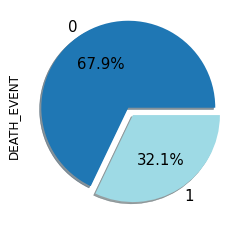

In [9]:
graph1=dataset[target[0]].value_counts().plot.pie(autopct='%0.1f%%',
                                                      colormap="tab20",
                                                      fontsize=15,
                                                      shadow=True,
                                                      explode=[0.1,0])

Text(0, 0.5, 'Count')

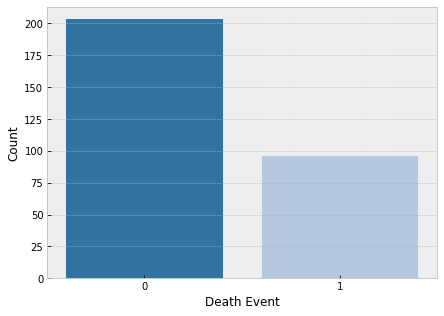

In [10]:
cols= ["Blue","lightblue"]
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="DEATH_EVENT", data=dataset, palette='tab20')
plt.xlabel('Death Event')
plt.ylabel('Count')

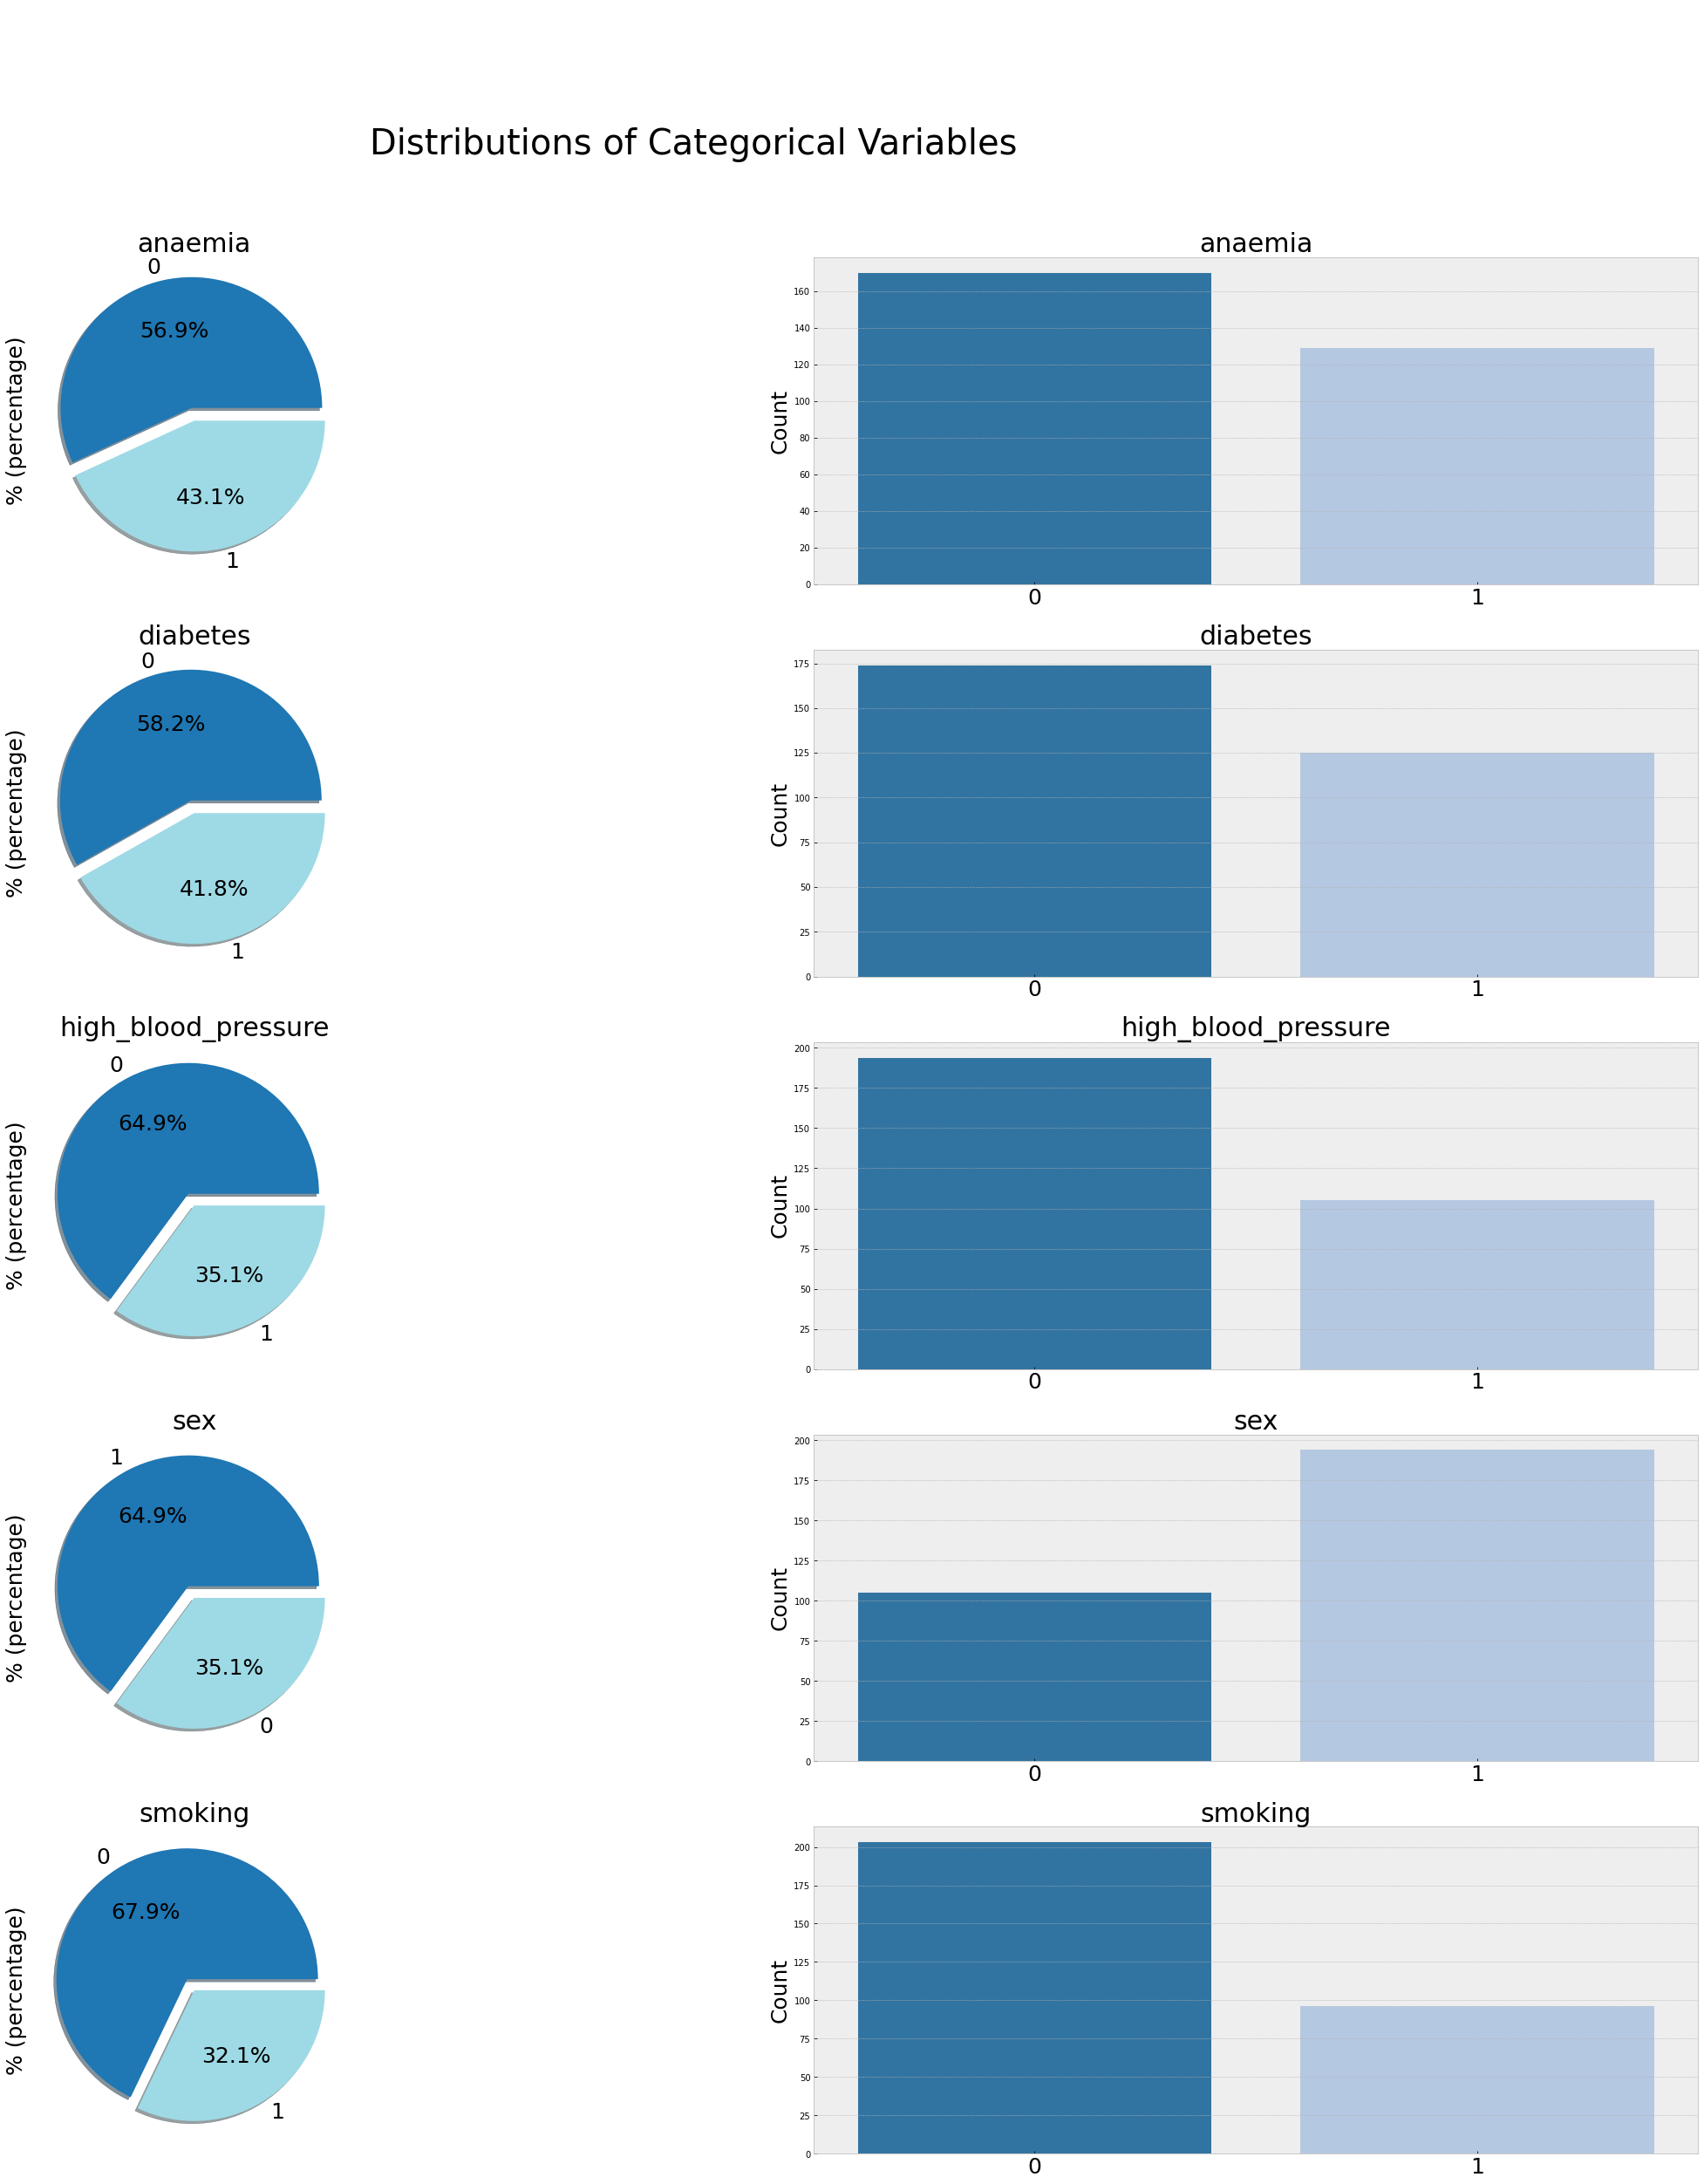

In [11]:
figure, axes = plt.subplots(nrows=5, ncols=2,figsize=(40, 40))
figure.suptitle('\n\n\nDistributions of Categorical Variables', fontsize=40)

for i in range(len(categoricals)):
    column=categoricals[i]
    graph1=dataset[column].value_counts().plot.pie(autopct='%0.1f%%',
                                                      ax=axes[i,0],
                                                      colormap="tab20",
                                                      fontsize=25,
                                                      shadow=True,
                                                      explode=[0.1,0])
    axes[i,0].set_ylabel('% (percentage)',fontsize=25)
    axes[i,0].set_title(column, fontsize=30)
    graph2=sns.countplot(x=column,
                         data=dataset,
                         palette='tab20',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=25)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), fontsize=25)
    axes[i,1].set_title(column, fontsize=30)
    
plt.show()

In [12]:
import warnings
warnings.filterwarnings("ignore")
colors = ['green', 'mediumturquoise', 'lightpurple', 'lightgreen']

anaemia = dataset[dataset["anaemia"]==1]
notanaemia = dataset[dataset["anaemia"]==0]

anaemia_surv = anaemia[dataset["DEATH_EVENT"]==0]
anaemia_decr = anaemia[dataset["DEATH_EVENT"]==1]
notanaemia_surv = notanaemia[dataset["DEATH_EVENT"]==0]
notanaemia_decr = notanaemia[dataset["DEATH_EVENT"]==1]

labels = ['Anemia - Survived','Anemia - Not Survived','Not Anemia - Survived', 'Not Anemia - Not Survived']
values = [len(anaemia_surv),len(anaemia_decr),len(notanaemia_surv),len(notanaemia_decr)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, pull=[0.1, 0.1, 0.2, 0.1])])
fig.update_traces(hoverinfo='label+percent', textinfo='value + percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Perbandingan Anaemia dengan DEATH_EVENT")
fig.show()

In [13]:
import warnings
warnings.filterwarnings("ignore")
colors = ['green', 'mediumturquoise', 'lightpurple', 'lightgreen']

diabet = dataset[dataset["diabetes"]==1]
notdiabet = dataset[dataset["diabetes"]==0]

diabet_surv = diabet[dataset["DEATH_EVENT"]==0]
diabet_decr = diabet[dataset["DEATH_EVENT"]==1]
notdiabet_surv = notdiabet[dataset["DEATH_EVENT"]==0]
notdiabet_decr = notdiabet[dataset["DEATH_EVENT"]==1]

labels = ['Diabetes - Survived','Diabetes - Not Survived','Not Diabetes - Survived', 'Not Diabetes - Not Survived']
values = [len(diabet_surv),len(diabet_decr),len(notdiabet_surv),len(notdiabet_decr)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, pull=[0.1, 0.1, 0.2, 0.1])])
fig.update_traces(hoverinfo='label+percent', textinfo='value + percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Perbandingan Diabetes dengan DEATH_EVENT")
fig.show()

In [14]:
import warnings
warnings.filterwarnings("ignore")
colors = ['green', 'mediumturquoise', 'lightpurple', 'lightgreen']

high_blood_pressure = dataset[dataset["high_blood_pressure"]==1]
not_high_blood_pressure = dataset[dataset["high_blood_pressure"]==0]

high_blood_pressure_surv = high_blood_pressure[dataset["DEATH_EVENT"]==0]
high_blood_pressure_decr = high_blood_pressure[dataset["DEATH_EVENT"]==1]
not_high_blood_pressure_surv = not_high_blood_pressure[dataset["DEATH_EVENT"]==0]
not_high_blood_pressure_decr = not_high_blood_pressure[dataset["DEATH_EVENT"]==1]

labels = ['High Blood Pressure - Survived','High Blood Pressure - Not Survived','Not High Blood Pressure - Survived', 'Not High Blood Pressure - Not Survived']
values = [len(high_blood_pressure_surv),len(high_blood_pressure_decr),len(not_high_blood_pressure_surv),len(not_high_blood_pressure_decr)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, pull=[0.1, 0.1, 0.2, 0.1])])
fig.update_traces(hoverinfo='label+percent', textinfo='value + percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Perbandingan High Blood Pressure dengan DEATH_EVENT")
fig.show()

In [15]:
import warnings
warnings.filterwarnings("ignore")
colors = ['green', 'mediumturquoise', 'lightpurple', 'lightgreen']

male = dataset[dataset["sex"]==1]
female = dataset[dataset["sex"]==0]

male_surv = male[dataset["DEATH_EVENT"]==0]
male_decr = male[dataset["DEATH_EVENT"]==1]
female_surv = female[dataset["DEATH_EVENT"]==0]
female_decr = female[dataset["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived','Female - Survived', 'Female - Not Survived']
values = [len(male_surv),len(male_decr),len(female_surv),len(female_decr)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, pull=[0.2, 0.1, 0.1, 0.1])])
fig.update_traces(hoverinfo='label+percent', textinfo='value + percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Perbandingan Sex dengan DEATH_EVENT")
fig.show()

In [16]:
import warnings
warnings.filterwarnings("ignore")
colors = ['green', 'mediumturquoise', 'lightpurple', 'lightgreen']

smoking = dataset[dataset["smoking"]==1]
notsmoking = dataset[dataset["smoking"]==0]

smoking_surv = smoking[dataset["DEATH_EVENT"]==0]
smoking_decr = smoking[dataset["DEATH_EVENT"]==1]
notsmoking_surv = notsmoking[dataset["DEATH_EVENT"]==0]
notsmoking_decr = notsmoking[dataset["DEATH_EVENT"]==1]

labels = ['Smoking - Survived','Smoking - Not Survived','Not Smoking - Survived', 'Not Smoking - Not Survived']
values = [len(smoking_surv),len(smoking_decr),len(notsmoking_surv),len(notsmoking_decr)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, pull=[0.1, 0.1, 0.2, 0.1])])
fig.update_traces(hoverinfo='label+percent', textinfo='value + percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Perbandingan Smoking dengan DEATH_EVENT")
fig.show()

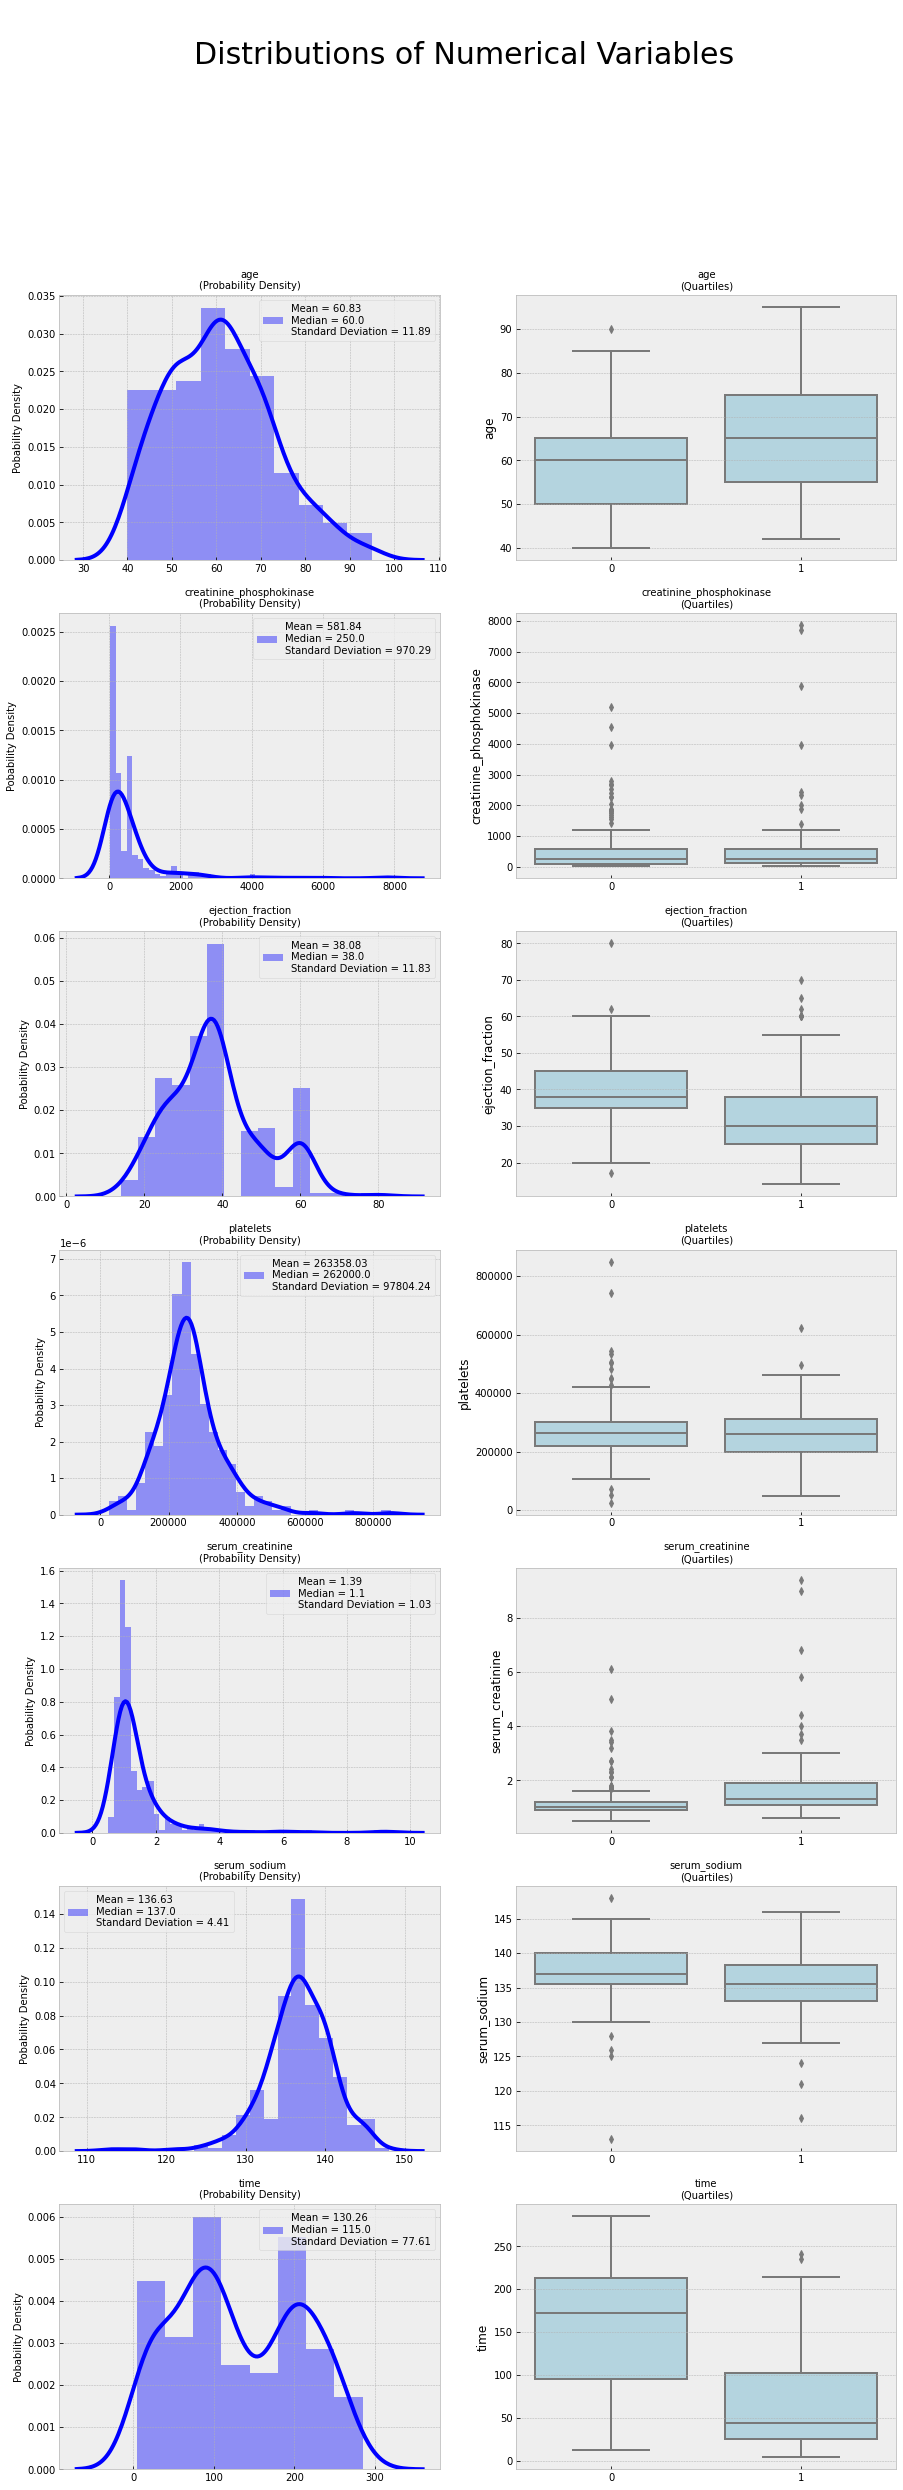

In [17]:
figure, axes = plt.subplots(nrows=7, ncols=2,figsize=(15,40))
figure.suptitle('\nDistributions of Numerical Variables', fontsize=30)

for i in range(len(numericals)):
    
    col=numericals[i]
    
    label1='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%dataset[col].mean(),dataset[col].median(),"%.2f"%dataset[col].std())
    graph1=sns.distplot(dataset[col],
                        color="blue",
                        ax=axes[i,0],
                        kde_kws={"lw":4},
                        label=label1)
    graph1=graph1.legend(loc='best',fontsize=10)
    axes[i,0].set_title(col+'\n(Probability Density)',fontsize=10)
    axes[i,0].set_xlabel(None)
    axes[i,0].set_ylabel("Pobability Density",fontsize=10)
    
    graph2=sns.boxplot(x='DEATH_EVENT',
                       y=col,
                       data=dataset,
                       ax=axes[i,1],
                       color=("lightblue")                      )
    axes[i,1].set_xlabel(None)
    axes[i,1].set_title(col+'\n(Quartiles)',fontsize=10)
    
    
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

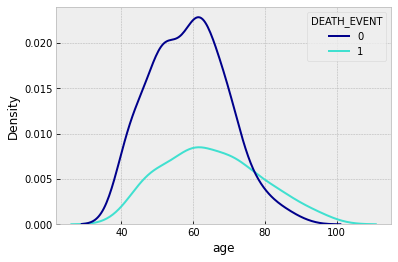

In [18]:
cols= ["darkBlue","turquoise"]
sns.kdeplot(x=dataset["age"], hue = dataset["DEATH_EVENT"], palette=cols)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Density'>

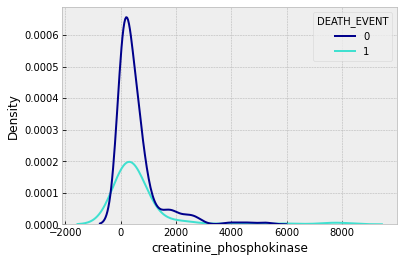

In [19]:
cols= ["darkBlue","turquoise"]
sns.kdeplot(x=dataset["creatinine_phosphokinase"], hue = dataset["DEATH_EVENT"], palette=cols)

<AxesSubplot:xlabel='ejection_fraction', ylabel='Density'>

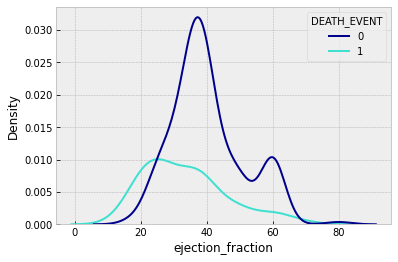

In [20]:
cols= ["darkBlue","turquoise"]
sns.kdeplot(x=dataset["ejection_fraction"], hue = dataset["DEATH_EVENT"], palette=cols)

<AxesSubplot:xlabel='platelets', ylabel='Density'>

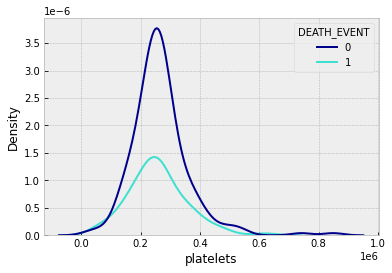

In [21]:
cols= ["darkBlue","turquoise"]
sns.kdeplot(x=dataset["platelets"], hue = dataset["DEATH_EVENT"], palette=cols)

<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

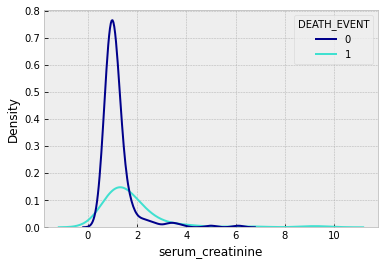

In [22]:
cols= ["darkBlue","turquoise"]
sns.kdeplot(x=dataset["serum_creatinine"], hue = dataset["DEATH_EVENT"], palette=cols)

<AxesSubplot:xlabel='serum_sodium', ylabel='Density'>

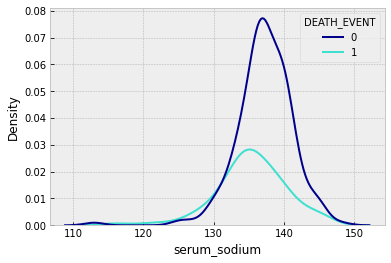

In [23]:
cols= ["darkBlue","turquoise"]
sns.kdeplot(x=dataset["serum_sodium"], hue = dataset["DEATH_EVENT"], palette=cols)

<AxesSubplot:xlabel='time', ylabel='Density'>

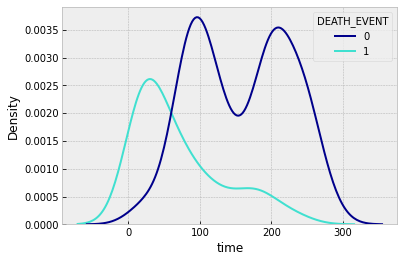

In [24]:
cols= ["darkBlue","turquoise"]
sns.kdeplot(x=dataset["time"], hue = dataset["DEATH_EVENT"], palette=cols)

<AxesSubplot:>

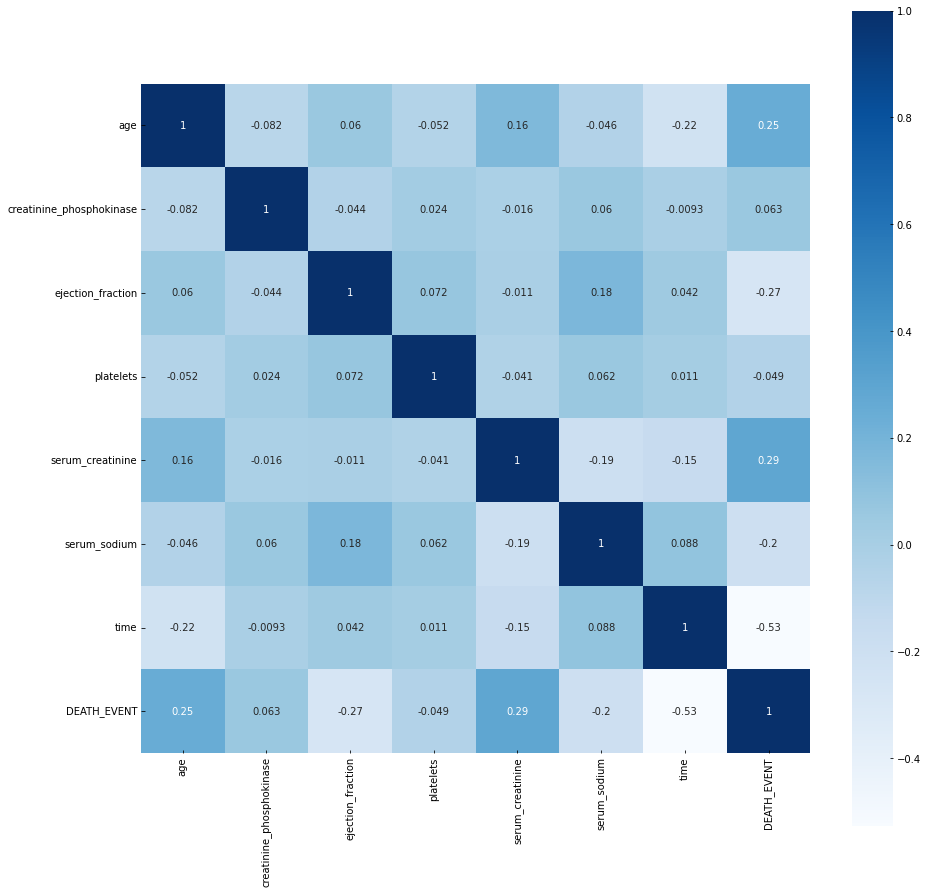

In [25]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = dataset.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,cmap= 'Blues',annot=True, square=True)

In [26]:
dataset.corr()[abs(dataset.corr()['DEATH_EVENT']) > 0.1]['DEATH_EVENT']  
#Fitur 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', dan 'time' memiliki korelasi yang cukup besar dengan 'DEATH_EVENT'

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:xlabel='time', ylabel='age'>

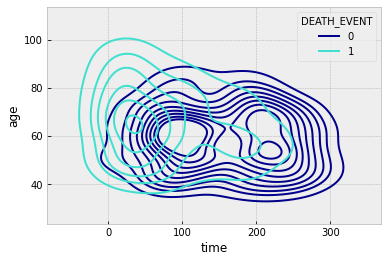

In [27]:
cols= ["darkBlue","turquoise"]
# Melakukan plotting "Kernel Density Estimation (kde plot)" dengan fitur time and age karena keduanya signifikan
sns.kdeplot(x=dataset["time"], y=dataset["age"], hue =dataset["DEATH_EVENT"], palette=cols)

# Splitting in Testing and Training 

In [28]:
from sklearn.model_selection import train_test_split
#hanya menggunakan data yang kolerasinya tinggi
data1 = dataset[['ejection_fraction','serum_creatinine','time','serum_sodium','age']]
data2 = dataset['DEATH_EVENT']

scaler = StandardScaler()
newdata1 = scaler.fit_transform(data1)

X_train, X_test, y_train, y_test = train_test_split(newdata1, data2, test_size = 0.3, random_state= 0)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(5), float64(3), int64(5)
memory usage:

# Modeling

### KNN Algo

In [30]:
scores_data = pd.DataFrame()
n_neighbors = range(2, 20)

for neighbor in n_neighbors:
    kNN_clf = KNeighborsClassifier(n_neighbors=neighbor)
    kNN_clf.fit(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(kNN_clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'neighbors': [neighbor],
                                         'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data).reset_index(drop=True)
    
scores_data.head()

neighbors  cross_val_score
0          2         0.746341
1          3         0.803833
2          4         0.794425
3          5         0.784785
4          6         0.770267

<AxesSubplot:xlabel='neighbors', ylabel='cross_val_score'>

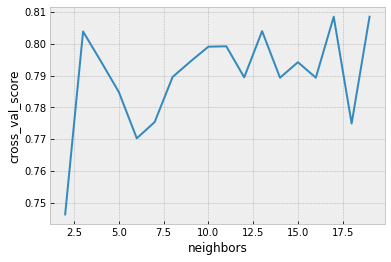

In [31]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='neighbors', y='cross_val_score', data=scores_data)

In [32]:
scores_data.sort_values(by='cross_val_score', ascending=False).head()

neighbors  cross_val_score
17         19         0.808479
15         17         0.808479
11         13         0.803949
1           3         0.803833
9          11         0.799187

In [33]:
kNN_clf = KNeighborsClassifier(n_neighbors=3)

kNN_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred_kNN = kNN_clf.predict(X_test)
y_pred_prob_kNN = kNN_clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        62
           1       0.67      0.71      0.69        28

    accuracy                           0.80        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.80      0.80      0.80        90



<Figure size 432x288 with 0 Axes>

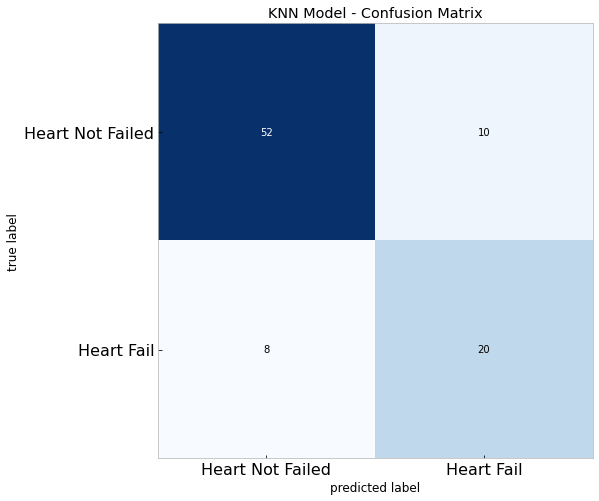

In [35]:
print(classification_report(y_test, y_pred_kNN))
kNN_f1_score = f1_score(y_test, y_pred_kNN)
cm_KNN = confusion_matrix(y_test, y_pred_kNN)
plt.figure()
plot_confusion_matrix(cm_KNN, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [36]:
kNN_f1_score

0.689655172413793

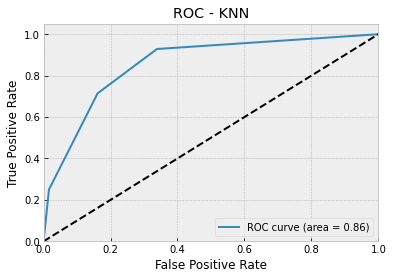

0.8554147465437789

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_kNN[:,1])
roc_auc_kNN= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_kNN)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN')
plt.legend(loc="lower right")
plt.show()
roc_auc_kNN

### SVM Algo

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.86      0.64      0.73        28

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90



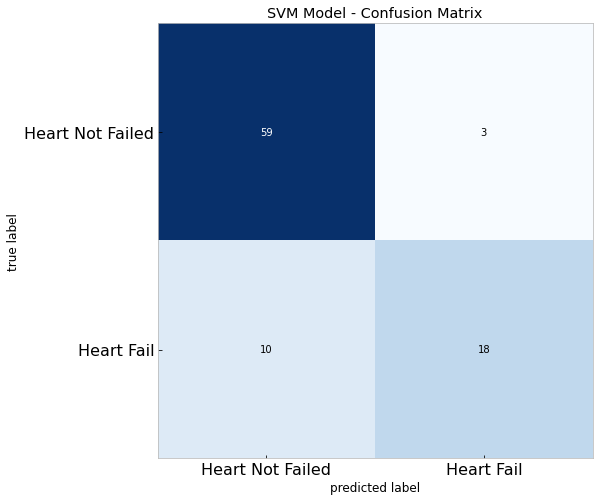

In [38]:
model_svm=svm.SVC(probability=True)
 
model_svm.fit (X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))
SVM_f1_score = f1_score(y_test, y_pred_svm)
cf_matrix = confusion_matrix(y_test ,y_pred_svm)
plot_confusion_matrix(cf_matrix, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [39]:
SVM_f1_score

0.7346938775510204

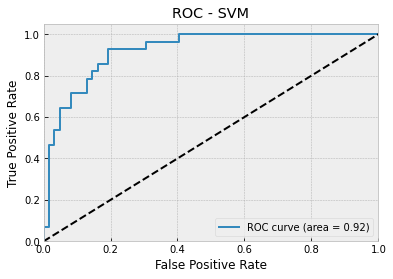

0.9210829493087558

In [40]:
y_pred_SVM = model_svm.predict(X_test)
y_pred_prob_SVM = model_svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_SVM[:,1])
roc_auc_SVM= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_SVM)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM')
plt.legend(loc="lower right")
plt.show()
roc_auc_SVM

### Random Forest Algo

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        62
           1       0.90      0.64      0.75        28

    accuracy                           0.87        90
   macro avg       0.88      0.81      0.83        90
weighted avg       0.87      0.87      0.86        90



<Figure size 432x288 with 0 Axes>

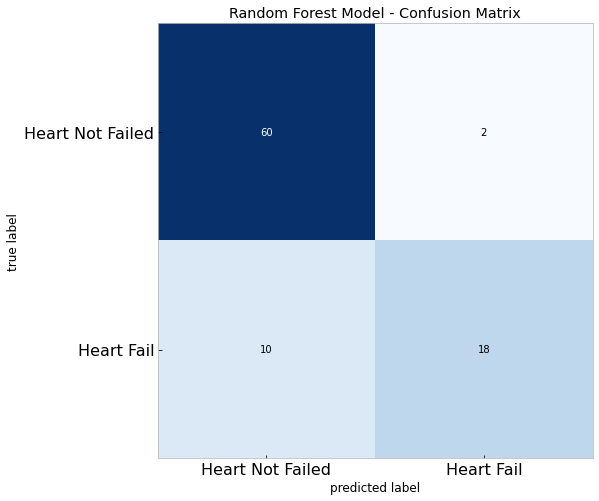

In [41]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
RF_f1_score = f1_score(y_test, r_pred)
print(classification_report(y_test, r_pred))
cm_rf = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm_rf, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [42]:
RF_f1_score

0.75

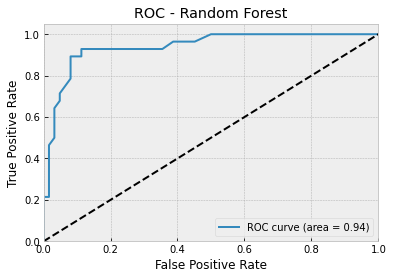

0.9398041474654378

In [43]:
y_pred_RF = r_clf.predict(X_test)
y_pred_prob_RF = r_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_RF[:,1])
roc_auc_RF= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()
roc_auc_RF

Text(0.5, 1.0, 'Variable Importance Plot')

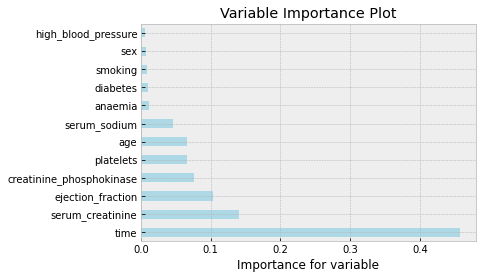

In [44]:
X = dataset.drop(['DEATH_EVENT'], axis=1)
y = dataset.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r_clf2 = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf2.fit(X_train, y_train)

feat_importances = pd.Series(r_clf2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh', color = 'lightblue')
plt.xlabel('Importance for variable');
plt.title('Variable Importance Plot')

In [45]:
scores_comparison = pd.DataFrame({'Model': ['k-Nearest Neighbors', 'Support Vector Machines', 'Random Forest'], 
                                  'Accuracy': ('80%', '86%', '87%'),
                                  'F1 Score': (kNN_f1_score, SVM_f1_score, RF_f1_score), 
                                  'ROC-AUC Score': (roc_auc_kNN, roc_auc_SVM, roc_auc_RF)})
scores_comparison

Model Accuracy  F1 Score  ROC-AUC Score
0      k-Nearest Neighbors      80%  0.689655       0.855415
1  Support Vector Machines      86%  0.734694       0.921083
2            Random Forest      87%  0.750000       0.939804